In [1]:
# I used Week_7_FTE_w_notes for this portion of code to gather reddit data related to the ashwagandha subreddit
import praw
import pandas as pd

import credentials

In [2]:
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

Version 7.0.0 of praw is outdated. Version 7.5.0 was released Sunday November 14, 2021.


In [3]:
co_subreddit = reddit.subreddit('ashwagandha').hot(limit=10) #setting the limit to "None" returns up to a 1000 posts

In [4]:
for post in co_subreddit:
    print(post.title, post.score)

Libido and Ash 8
anxiety, twitching, ashwagandha 4
What is there a difference in the effect of these Ashwagandha supplements 5
Suggested brands? 5
Ashwagandha ruined my life. 8
If you like ashwagandha like myself, try mixing ashwagandha powder or capsule in this smoothie and watch the results after 1 week!!!! 0
Is 928mg of ashwaganda too much for a 16 yr old boy? Bw:160 height:5’9 5
sexuall dysfunctions 3
Best for Productivity and Grades? 2
My good and horrific experience with ash 6


In [5]:
list(co_subreddit)

[]

In [6]:
post.author

Redditor(name='TacticalPeen')

In [7]:
post.score

6

In [8]:
post.permalink

'/r/ASHWAGANDHA/comments/ts8ut8/my_good_and_horrific_experience_with_ash/'

In [9]:
#shorter version
#reddit_data_d= {k: [] for k in ["title", "link","author", "text"] } #this is one way to specify fields
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}


co_subreddit = reddit.subreddit('ashwagandha').hot(limit=None)

for post in list(co_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [10]:
co_df = pd.DataFrame(reddit_data)

In [11]:
co_df

,title,link,author,n_comments,score,text
0,Libido and Ash,/r/ASHWAGANDHA/comments/u7yzrh/libido_and_ash/,evolveeproject,12,7,Anybody keen on sharing their experiences taki...
1,"anxiety, twitching, ashwagandha",/r/ASHWAGANDHA/comments/u2up48/anxiety_twitchi...,scampdogg,8,3,So wondered if anyone could help me out... I'v...
2,What is there a difference in the effect of th...,/r/ASHWAGANDHA/comments/u20zi3/what_is_there_a...,DylanWatsono,0,5,"Hey, so I used this ashwagandha before and saw..."
3,Suggested brands?,/r/ASHWAGANDHA/comments/u0srwt/suggested_brands/,virginbone,4,6,"I've tried a few different brands, The results..."
4,Ashwagandha ruined my life.,/r/ASHWAGANDHA/comments/tyljyf/ashwagandha_rui...,SlowAd9111,20,8,\n\nI write this piece as to either relate or...
...,...,...,...,...,...,...
789,Does anyone grow Ashwaganda?,/r/ASHWAGANDHA/comments/d19d7m/does_anyone_gro...,alien_sushi,4,4,"Hi! Just wondering if anyone grows it, and if ..."
790,Anyone think 600mg is enough. I read that it a...,/r/ASHWAGANDHA/comments/d03v6i/anyone_think_60...,DONOTTOUCHYOURDICK,8,6,
791,Anyone ever had the Ashwagandha capsule open i...,/r/ASHWAGANDHA/comments/cml7w7/anyone_ever_had...,thrilledsloth,4,3,I used to be an avid Ashwagandha fan and took ...
792,I have to take aspirin. Can I take it together...,/r/ASHWAGANDHA/comments/c032iz/i_have_to_take_...,veeritablenantais,0,1,Is ashwhaghandha a blood thinner?


In [12]:
import sqlite3

con = sqlite3.connect("co_reddit.sqlite")
co_df.to_sql('posts', con, if_exists='replace', index=False)

794

In [13]:
co_df_check = pd.read_sql_query('SELECT * FROM posts;', con)
# it's best to close the connection when finished
con.close()
co_df_check

,title,link,author,n_comments,score,text
0,Libido and Ash,/r/ASHWAGANDHA/comments/u7yzrh/libido_and_ash/,evolveeproject,12,7,Anybody keen on sharing their experiences taki...
1,"anxiety, twitching, ashwagandha",/r/ASHWAGANDHA/comments/u2up48/anxiety_twitchi...,scampdogg,8,3,So wondered if anyone could help me out... I'v...
2,What is there a difference in the effect of th...,/r/ASHWAGANDHA/comments/u20zi3/what_is_there_a...,DylanWatsono,0,5,"Hey, so I used this ashwagandha before and saw..."
3,Suggested brands?,/r/ASHWAGANDHA/comments/u0srwt/suggested_brands/,virginbone,4,6,"I've tried a few different brands, The results..."
4,Ashwagandha ruined my life.,/r/ASHWAGANDHA/comments/tyljyf/ashwagandha_rui...,SlowAd9111,20,8,\n\nI write this piece as to either relate or...
...,...,...,...,...,...,...
789,Does anyone grow Ashwaganda?,/r/ASHWAGANDHA/comments/d19d7m/does_anyone_gro...,alien_sushi,4,4,"Hi! Just wondering if anyone grows it, and if ..."
790,Anyone think 600mg is enough. I read that it a...,/r/ASHWAGANDHA/comments/d03v6i/anyone_think_60...,DONOTTOUCHYOURDICK,8,6,
791,Anyone ever had the Ashwagandha capsule open i...,/r/ASHWAGANDHA/comments/cml7w7/anyone_ever_had...,thrilledsloth,4,3,I used to be an avid Ashwagandha fan and took ...
792,I have to take aspirin. Can I take it together...,/r/ASHWAGANDHA/comments/c032iz/i_have_to_take_...,veeritablenantais,0,1,Is ashwhaghandha a blood thinner?


In [14]:
!conda install -c conda-forge nltk -y

Solving environment: done

# All requested packages already installed.



In [15]:
import nltk

fd = nltk.FreqDist(' '.join(co_df['title']).split())

fd.most_common(20)

[('Ashwagandha', 157),
 ('and', 139),
 ('to', 115),
 ('I', 103),
 ('for', 96),
 ('a', 84),
 ('the', 84),
 ('ashwagandha', 80),
 ('of', 71),
 ('take', 65),
 ('it', 65),
 ('with', 64),
 ('this', 59),
 ('in', 54),
 ('is', 51),
 ('or', 42),
 ('you', 38),
 ('Is', 38),
 ('on', 37),
 ('How', 36)]

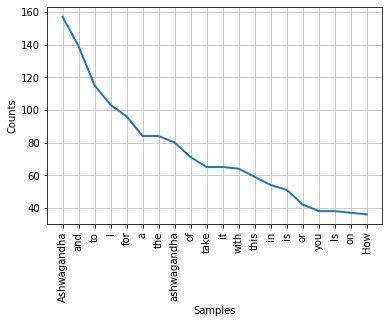

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
fd.plot(20)

In [17]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops
#stops = stops + colorado
#stops = set(stop) +set (['colorado', 'co'])

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
nltk.download('stopwords') # if this is not working stopwords from scikit learn

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christinetran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
words = ' '.join(co_df['title']).lower().split()
cleaned_words = [w for w in words if w not in set(stops)] #with set the words are bing hashed, i.e. assigned a number

In [20]:
cleaned_fd = nltk.FreqDist(cleaned_words)
cleaned_fd.most_common(20)

[('ashwagandha', 240),
 ('take', 68),
 ('ash', 52),
 ('anyone', 51),
 ('taking', 42),
 ('brand', 39),
 ('ashwaganda', 34),
 ('effects', 28),
 ('like', 27),
 ('best', 27),
 ('good', 24),
 ('long', 23),
 ('help', 21),
 ('question', 20),
 ('side', 20),
 ('first', 19),
 ('ashwagandha?', 19),
 ('powder', 18),
 ('sleep', 18),
 ('get', 18)]

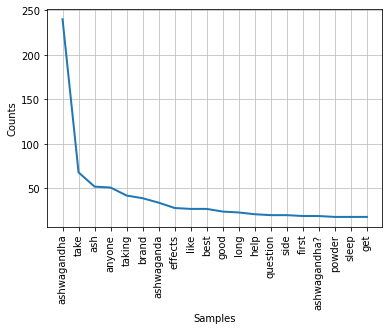

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
cleaned_fd.plot(20)

In [ ]:
#FTE Week 8 from Dr. Busch
reddit_posts_data = {'title': [],
                    'link': [],
                    'author': [],
                    'n_comments': [],
                    'score': [],
                    'text': [],
                    'id': []}

reddit_comments_data = {'author': [],
                        'score': [],
                        'text': [],
                        'post_id': []}


co_subreddit = reddit.subreddit('ashwagandha').new(limit=None)

for post in list(co_subreddit):
    reddit_posts_data['title'].append(post.title)
    reddit_posts_data['link'].append(post.permalink)
    if post.author is None:
        reddit_posts_data['author'].append(None)
    else:
        reddit_posts_data['author'].append(post.author.name)
    reddit_posts_data['n_comments'].append(post.num_comments)
    reddit_posts_data['score'].append(post.score)
    reddit_posts_data['text'].append(post.selftext)
    reddit_posts_data['id'].append(post.id)

    post.comments.replace_more(limit=None)
    for comment in post.comments:
        if comment.author is None:
            reddit_comments_data['author'].append('')
        else:
            reddit_comments_data['author'].append(comment.author.name)
        reddit_comments_data['score'].append(comment.score)
        reddit_comments_data['text'].append(comment.body)
        reddit_comments_data['post_id'].append(post.id)

post_df = pd.DataFrame(reddit_posts_data)
comment_df = pd.DataFrame(reddit_comments_data)

con = sqlite3.connect('co_reddit.sqlite')
post_df.to_sql('posts', con, if_exists='replace')
comment_df.to_sql('comments', con, if_exists='replace')
con.close()

/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/christinetran/opt/anaconda3/lib/pytho

In [23]:
comment_df

,author,score,text,post_id
0,evolveeproject,5,I have been cumming and/or feeling like mastur...,u7yzrh
1,Longjumping-Secret49,5,For me it increases the libido. Erections are ...,u7yzrh
2,amazon_gem,2,"For context, I am a woman -- adding this info ...",u2up48
3,Square_Area_2517,2,I think Ash could very well be helpful to you....,u2up48
4,Few-Competition-7168,2,"My neck twitches sometimes when I get anxious,...",u2up48
...,...,...,...,...
1983,craigjames357,2,I take 600mg when calming down before bed. Max...,d03v6i
1984,Enhanced_ByScience,1,I personally found 600 mg to be too low. I exp...,d03v6i
1985,Emireth,1,Are you drinking enough liquids?,cml7w7
1986,Stressed1_2,1,Do you have a hiatal hernia? GERD?,cml7w7


In [24]:
List1 = comment_df
List1 = [str(i) for i in List1] # map to a list of strings
string_uncleaned = ' , '.join(List1)
string_uncleaned

'author , score , text , post_id'

In [25]:
# Preprocessing string - tokenizing & cleaned strings
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist

In [26]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
tokenized_string = tokenizer.tokenize(string_uncleaned)
print(tokenized_string)

['author', 'score', 'text', 'post_id']


In [27]:
#Python Reddit API Wrapper (PRAW) to access Reddit's API
import praw
import pandas as pd
import credentials

#Word Cloud packages
from wordcloud import WordCloud

#Data exploration and processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

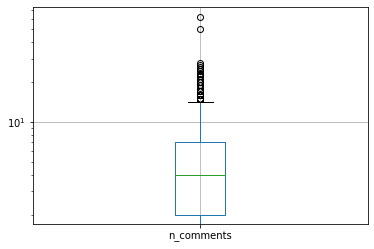

In [28]:
#number of comments
co_df.boxplot('n_comments')
plt.yscale('log')

In [29]:
words = ' '.join(comment_df['text']).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]

In [30]:
cleaned_comments = nltk.FreqDist(cleaned_words)
cleaned_comments.most_common(20)

[('take', 559),
 ('taking', 468),
 ('ashwagandha', 346),
 ('like', 307),
 ('feel', 212),
 ('get', 210),
 ('also', 208),
 ('ash', 200),
 ('anxiety', 189),
 ('day', 177),
 ('would', 175),
 ('it.', 174),
 ('effects', 160),
 ('really', 155),
 ('good', 155),
 ('took', 155),
 ('one', 153),
 ('started', 152),
 ('i’m', 148),
 ('it’s', 147)]

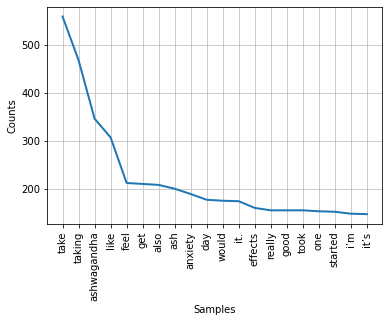

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
cleaned_comments.plot(20)

## Keyword sentiment

In [32]:
#Existing sentiment dictionary
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')

In [33]:
sentiment_df

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


In [34]:
#import libraries 
import praw
from textblob import TextBlob # processes textual data
# VADER can be accessed by the NLTK library.
import nltk
# Download the VADAR tool and access it through the NLTK library.
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/christinetran/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
# Preprocessing string - tokenizing & cleaned strings
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist

In [36]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
tokenized_string = tokenizer.tokenize(string_uncleaned)
print(tokenized_string)

['author', 'score', 'text', 'post_id']


In [37]:
#Preprocess string - converting Tokens into Lowercase
lower_string_tokenized = [word.lower() for word in tokenized_string]
print(lower_string_tokenized)

['author', 'score', 'text', 'post_id']


In [38]:
sentiment_dict = sentiment_df.to_dict()['score']

In [39]:
text_sentiments = []
for text in comment_df['text']:
    words = text.lower().split()
    this_text_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_text_sentiments.append(sentiment_dict[w])
        else:
            this_text_sentiments.append(0)
            
    
    text_sentiments.append(np.mean(this_text_sentiments))

In [40]:
comment_df['keyword_sentiment'] = text_sentiments

<AxesSubplot:ylabel='Frequency'>

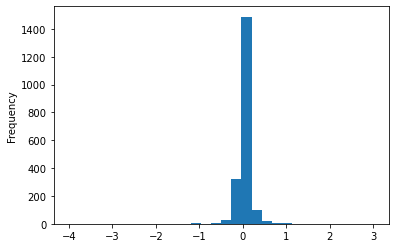

In [41]:
comment_df['keyword_sentiment'].plot.hist(bins=30)

In [42]:
comment_df['keyword_sentiment'].mean()

0.029651512640512218

In [43]:
comment_df['keyword_sentiment'].std()

0.21098794224053036

In [44]:
comment_df.sort_values(by='keyword_sentiment')[['text', 'keyword_sentiment']]

,text,keyword_sentiment
1092,Wtf,-4.0
1508,ksm sucks,-1.5
1051,This Shit made my nuts hurt,-1.5
908,No,-1.0
1309,no,-1.0
...,...,...
401,Feel great and sex is great,1.0
1028,I love shoden!,1.0
817,Good one,1.5
1076,Lol,3.0


In [45]:
# full titles of the bottom 10 sentiments
comment_df.sort_values(by='keyword_sentiment')['text'].to_list()[:10]

['Wtf',
 'ksm sucks',
 'This Shit made my nuts hurt',
 'No',
 'no',
 'No',
 'Stupid post.',
 'No',
 'no',
 'No no no.']

In [46]:
# full titles of the top 10 sentiments
comment_df.sort_values(by='keyword_sentiment', ascending=False)['text'].to_list()[:10]

['Lol',
 'Lol',
 'Good one',
 'Naw you good',
 'Best review ever',
 'I love shoden!',
 'Feel great and sex is great',
 'Thanks xx',
 'thank you',
 'Yes']

In [47]:
#for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/christinetran/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [48]:
comment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   author             1988 non-null   object 
 1   score              1988 non-null   int64  
 2   text               1988 non-null   object 
 3   post_id            1988 non-null   object 
 4   keyword_sentiment  1988 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 77.8+ KB


In [49]:
comment_df.describe()

,score,keyword_sentiment
count,1988.000000,1988.000000
mean,1.679577,0.029652
std,1.332285,0.210988
min,-5.000000,-4.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,0.075330
max,15.000000,3.000000


## **Preparation of text for analysis for LDA**
- Elimination of stopwords, punctuation, digits, lowercase

In [50]:
comment_df.columns = comment_df.columns.str.replace("'"," ")

In [51]:
comment_df.isnull().sum()

author               0
score                0
text                 0
post_id              0
keyword_sentiment    0
dtype: int64

In [52]:
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import warnings
warnings.filterwarnings("ignore")

In [53]:
#Cleaning text data 
#taking a look at the one column I have
comment_df['text'].unique()

array(["I have been cumming and/or feeling like masturbating relatively more, it's been maybe nearly two or so weeks on Ash.. I'm not sure this is real or just... Idk",
       'For me it increases the libido. Erections are also stronger than usual. Overall mood is also nice. The situations that used to make me agitated would become managable',
       "For context, I am a woman -- adding this info because it seems to me it's mostly men that report experiencing adverse effects from ash. In my case, it has really helped me with my anxiety. Every time I get that sensation that I associate with it, I take a capsule (I use the full spec type), and the sensation goes away. Btw, one supplement that helps me with stress but has ash in it and other adaptogens is Adrenasense.",
       ..., 'Are you drinking enough liquids?',
       'Do you have a hiatal hernia?  GERD?',
       'Ashwaganda is a hot herb. It’s supposed to be taken for a short period, then break.'],
      dtype=object)

In [54]:
#adapted from https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have", "ne'er": "never"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
comment_df['text']=comment_df['text'].apply(lambda x:expand_contractions(x))

In [55]:
#lowercase words
comment_df['cleaned']=comment_df['text'].apply(lambda x: x.lower())

In [56]:
#remove digits and words containing digits
comment_df['cleaned']=comment_df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [57]:
#remove puncuations
comment_df['cleaned']=comment_df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#remove extra spaces
comment_df['cleaned']=comment_df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [58]:
#how does text look after cleaning
for index,text in enumerate(comment_df['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 go back to taking the mg ashwaganda that is the one im taking but only take one capsule 
Review 2:
 yo i just started taking ash because my mom got it for me… last night i had some weird dreams for the first time but nothing too bad
but i came here to say growing up i had that same type of nightmare you described it’s such a bad feeling where u can’t speak or like get their attention and your motor skills don’t work right really scary
Review 3:
 i would be interested too i have taken ashwagandha for just about weeks with no problems but am wondering how long others been on it and has there been any side effects connected to long term use it is been so good for my anxiety that i hope to continue far into the future
Review 4:
 sex drive goes down alot been taking for about months now months on month rest 

abit hard to concentrate at times also found it to mess up my sleep schedule because im consistently tired not sure if its because of removing caffeine but i can sleep if un

In [59]:
from nltk.corpus import stopwords, words
stop = stopwords.words('english')

comment_df['cleaned'] = comment_df.cleaned.apply(lambda x: " ".join(w for w in x.split() if w not in stop))
comment_df.head(10)

,author,score,text,post_id,keyword_sentiment,cleaned
0,evolveeproject,5,I have been cumming and/or feeling like mastur...,u7yzrh,0.103448,cumming andor feeling like masturbating relati...
1,Longjumping-Secret49,5,For me it increases the libido. Erections are ...,u7yzrh,0.071429,increases libido erections also stronger usual...
2,amazon_gem,2,"For context, I am a woman -- adding this info ...",u2up48,0.012500,context woman adding info seems mostly men rep...
3,Square_Area_2517,2,I think Ash could very well be helpful to you....,u2up48,0.057377,think ash could well helpful taken withanolide...
4,Few-Competition-7168,2,"My neck twitches sometimes when I get anxious,...",u2up48,-0.067797,neck twitches sometimes get anxious started ta...
5,kmurphy4332,3,I take youtheory. U can get it at Costco.,u0srwt,0.000000,take youtheory u get costco
6,ValuableSafe281,3,Youtheory is good as suggested by someone in t...,u0srwt,0.150000,youtheory good suggested someone comments try ...
7,amazon_gem,1,I am taking Swanson full-spec ash.,u0srwt,0.000000,taking swanson fullspec ash
8,raptr69,1,i've had the best results with Pure Encapsulat...,u0srwt,0.400000,ive best results pure encapsulations capsules
9,LocationThin4587,5,I was taking Ash for six months only benefit I...,tyljyf,-0.063492,taking ash six months benefit noticed gym stop...


In [60]:
#word tokenization to divide text into sequence of words or sentences
tokens = ' '.join(comment_df.cleaned).split()
tokens[:20]

['cumming',
 'andor',
 'feeling',
 'like',
 'masturbating',
 'relatively',
 'maybe',
 'nearly',
 'two',
 'weeks',
 'ash',
 'sure',
 'real',
 'idk',
 'increases',
 'libido',
 'erections',
 'also',
 'stronger',
 'usual']

In [61]:
#lemmatization converts word to its root word. 
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#establish the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christinetran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [62]:
comment_df['cleaned'] = comment_df.cleaned.apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))
comment_df.head(10)

,author,score,text,post_id,keyword_sentiment,cleaned
0,evolveeproject,5,I have been cumming and/or feeling like mastur...,u7yzrh,0.103448,cumming andor feeling like masturbating relati...
1,Longjumping-Secret49,5,For me it increases the libido. Erections are ...,u7yzrh,0.071429,increase libido erection also stronger usual o...
2,amazon_gem,2,"For context, I am a woman -- adding this info ...",u2up48,0.012500,context woman adding info seems mostly men rep...
3,Square_Area_2517,2,I think Ash could very well be helpful to you....,u2up48,0.057377,think ash could well helpful taken withanolide...
4,Few-Competition-7168,2,"My neck twitches sometimes when I get anxious,...",u2up48,-0.067797,neck twitch sometimes get anxious started taki...
5,kmurphy4332,3,I take youtheory. U can get it at Costco.,u0srwt,0.000000,take youtheory u get costco
6,ValuableSafe281,3,Youtheory is good as suggested by someone in t...,u0srwt,0.150000,youtheory good suggested someone comment try n...
7,amazon_gem,1,I am taking Swanson full-spec ash.,u0srwt,0.000000,taking swanson fullspec ash
8,raptr69,1,i've had the best results with Pure Encapsulat...,u0srwt,0.400000,ive best result pure encapsulation capsule
9,LocationThin4587,5,I was taking Ash for six months only benefit I...,tyljyf,-0.063492,taking ash six month benefit noticed gym stopp...


## **Text Analytics**

In [63]:
#text visualization with WordCloud

#generate frequency dictionary for text data
freq = pd.Series(' '.join(comment_df.cleaned).split()).value_counts().to_dict()

# although dictionaries are useful data structures, they are had to 'slice-off' specific secions, so we use a list of this
list(freq.items())[:20]

[('take', 598),
 ('taking', 483),
 ('day', 449),
 ('ashwagandha', 433),
 ('effect', 326),
 ('like', 315),
 ('anxiety', 265),
 ('ash', 257),
 ('week', 246),
 ('feel', 235),
 ('get', 229),
 ('also', 229),
 ('would', 212),
 ('help', 199),
 ('time', 197),
 ('one', 188),
 ('month', 187),
 ('good', 187),
 ('sleep', 178),
 ('brand', 176)]

In [64]:
#remove single letter 'u'
comment_df['cleaned'] = comment_df.cleaned.apply(lambda x: " ".join(x for x in x.split() if len(x) > 1))

freq = pd.Series(' '.join(comment_df.cleaned).split()).value_counts().to_dict()
list(freq.items())[:20]

[('take', 598),
 ('taking', 483),
 ('day', 449),
 ('ashwagandha', 433),
 ('effect', 326),
 ('like', 315),
 ('anxiety', 265),
 ('ash', 257),
 ('week', 246),
 ('feel', 235),
 ('get', 229),
 ('also', 229),
 ('would', 212),
 ('help', 199),
 ('time', 197),
 ('one', 188),
 ('month', 187),
 ('good', 187),
 ('sleep', 178),
 ('brand', 176)]

In [65]:
#The ten least frequent words used
list(freq.items())[-10:]

[('marketed', 1),
 ('opsshttpsopssorg', 1),
 ('unclear', 1),
 ('certainty', 1),
 ('paramount', 1),
 ('certification', 1),
 ('verify', 1),
 ('thee', 1),
 ('articlehttpswwwopssorgarticlethirdpartycertificationwhyitsimportant', 1),
 ('hernia', 1)]

In [66]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(freq)

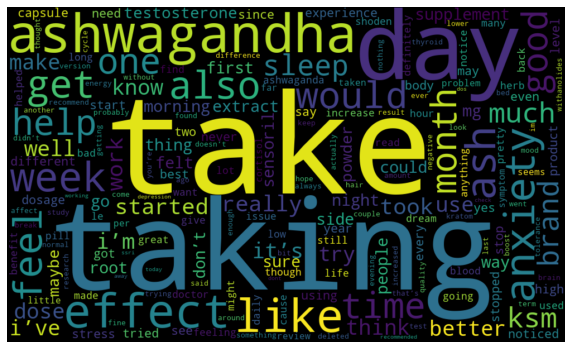

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## **N-grams**
- combine multiple words used together. N-grams capture language structure (i.e., what letter or word is likely to follow the given one)
- longer n-gram provide more context to work with. Optimal length of n-gram depends on what we want to 
- create bigrams for the dataset by first tokeni

In [68]:
#regenerate the tokens list, remember we did more data cleaning since we last generated this list
tokens = ' '.join(comment_df.cleaned).split()

In [69]:
# creating the bigrams
ngrams_2 = nltk.bigrams(tokens)

# freq distribution for these
freq_2grams = pd.Series(ngrams_2).value_counts().to_dict()
list(freq_2grams.items())[:20]

[(('side', 'effect'), 89),
 (('started', 'taking'), 77),
 (('taking', 'ashwagandha'), 39),
 (('feel', 'like'), 38),
 (('stopped', 'taking'), 37),
 (('per', 'day'), 36),
 (('root', 'powder'), 30),
 (('long', 'term'), 27),
 (('taking', 'ash'), 26),
 (('every', 'day'), 26),
 (('root', 'extract'), 25),
 (('first', 'time'), 25),
 (('blood', 'pressure'), 25),
 (('stop', 'taking'), 25),
 (('felt', 'like'), 24),
 (('panic', 'attack'), 23),
 (('take', 'day'), 21),
 (('hair', 'loss'), 20),
 (('sound', 'like'), 18),
 (('take', 'one'), 18)]

In [70]:
#generate trigrams
ngrams_3 = nltk.trigrams(tokens)

# freq distribution for these
freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:20]

[(('started', 'taking', 'ashwagandha'), 11),
 (('started', 'taking', 'ash'), 9),
 (('negative', 'side', 'effect'), 9),
 (('ksm', 'sensoril', 'shoden'), 7),
 (('black', 'pepper', 'extract'), 7),
 (('take', 'late', 'afternoon'), 7),
 (('really', 'bad', 'anxiety'), 7),
 (('mg', 'one', 'day'), 6),
 (('ashwagandha', 'root', 'extract'), 6),
 (('started', 'taking', 'day'), 6),
 (('withania', 'somnifera', 'ashwagandha'), 6),
 (('dry', 'conc', 'dry'), 5),
 (('cap', 'per', 'day'), 5),
 (('ash', 'cap', 'per'), 5),
 (('per', 'day', 'week'), 5),
 (('ext', 'dry', 'conc'), 5),
 (('low', 'blood', 'pressure'), 5),
 (('noticed', 'side', 'effect'), 5),
 (('side', 'effect', 'take'), 5),
 (('taking', 'every', 'day'), 5)]

## Part of Speech (POS) tagging
- Classify words into the POS and label them accordingly aka POS tagging.

In [71]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/christinetran/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [72]:
#tags associated with POS tagging process
#  'NN' --> singular noun, 'VBG' -->present verb, 'WRB' --> adverb.
from nltk.tag import pos_tag
pos_tags = pos_tag(tokens)
pos_tags[:20]

[('cumming', 'VBG'),
 ('andor', 'RP'),
 ('feeling', 'VBG'),
 ('like', 'IN'),
 ('masturbating', 'VBG'),
 ('relatively', 'RB'),
 ('maybe', 'RB'),
 ('nearly', 'RB'),
 ('two', 'CD'),
 ('week', 'NN'),
 ('ash', 'JJ'),
 ('sure', 'JJ'),
 ('real', 'JJ'),
 ('idk', 'JJ'),
 ('increase', 'NN'),
 ('libido', 'NN'),
 ('erection', 'NN'),
 ('also', 'RB'),
 ('stronger', 'JJR'),
 ('usual', 'JJ')]

In [73]:
#create frequency distribution for parts of speech in dataset
from collections import Counter

Counter([j for i,j in pos_tag(tokens)])

Counter({'VBG': 1783,
         'RP': 51,
         'IN': 851,
         'RB': 3049,
         'CD': 312,
         'NN': 14022,
         'JJ': 6704,
         'JJR': 203,
         'VBN': 739,
         'MD': 476,
         'VB': 1778,
         'VBZ': 200,
         'NNS': 776,
         'VBP': 1377,
         'VBD': 1824,
         'DT': 138,
         'RBR': 128,
         'RBS': 13,
         'JJS': 131,
         'FW': 47,
         'UH': 11,
         'NNP': 43,
         'PRP': 14,
         'CC': 31,
         'WRB': 8,
         'WDT': 5,
         'WP': 5,
         'PDT': 1,
         'WP$': 1,
         'PRP$': 1,
         'EX': 2})

In [74]:
cleaned_text= comment_df['cleaned']

In [75]:
print(len(cleaned_text))

1988


In [76]:
fdistribution = nltk.FreqDist(cleaned_text)

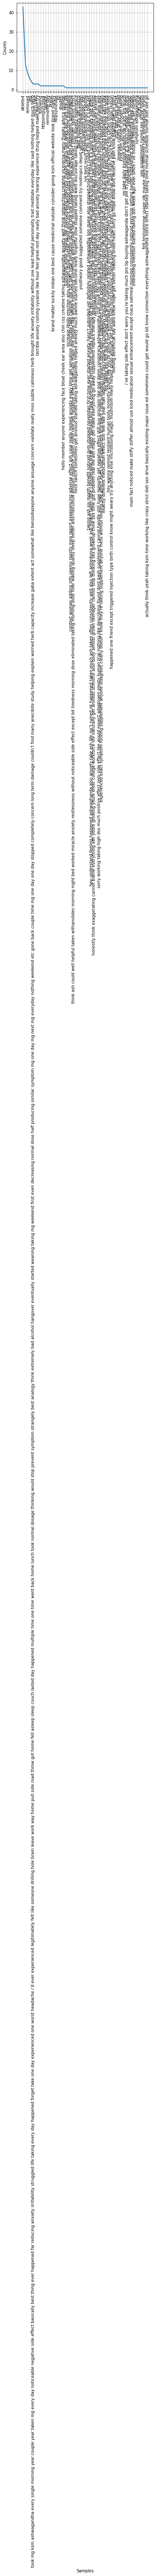

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [77]:
fdistribution.plot(50)

## **Sentiment Analysis**

In [78]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for sentences in comment_df['cleaned']:
    pol_score = sia.polarity_scores(sentences)
    pol_score['words'] = sentences
    results.append(pol_score)
    
pd.set_option('display.max_columns', None, 'max_colwidth', None)
df = pd.DataFrame.from_records(results)
df




,neg,neu,pos,compound,words
0,0.079,0.565,0.356,0.5994,cumming andor feeling like masturbating relatively maybe nearly two week ash sure real idk
1,0.127,0.549,0.325,0.5719,increase libido erection also stronger usual overall mood also nice situation used make agitated would become managable
2,0.165,0.773,0.061,-0.5542,context woman adding info seems mostly men report experiencing adverse effect ash case really helped anxiety every time get sensation associate take capsule use full spec type sensation go away btw one supplement help stress ash adaptogens adrenasense
3,0.194,0.548,0.258,0.6597,think ash could well helpful taken withanolides morning night bed worked miracle anxiety restlessness without noticeable side effect except bit tiredness morning dose eliminated taking morning dose hour waking quality sleep better also ridiculous amount negative report mind rare get negative effect especially major one people like whine everything something working like hear recommend sensoril shoden extract stronger sedative effect
4,0.378,0.504,0.118,-0.7755,neck twitch sometimes get anxious started taking ashwagandha helped anxiety much awhile started become really forgetful slow stopped taking want discourage taking help anxiety experience
...,...,...,...,...,...
1983,0.000,0.748,0.252,0.4019,take calming bed max i’ve ever gram seems excessive
1984,0.061,0.816,0.122,0.4767,personally found mg low experience best result mg bedtime mg needed day side note herbal know work buy pure powderedground form bulk weigh kitchen milligram scale much economical daily use
1985,0.000,1.000,0.000,0.0000,drinking enough liquid
1986,0.000,1.000,0.000,0.0000,hiatal hernia gerd


In [79]:
#Labeling sentiment
df['label'] = 0
df.loc[df['compound'] > 0.10, 'label'] = 1
df.loc[df['compound'] < -0.10, 'label'] = -1
df.head()

,neg,neu,pos,compound,words,label
0,0.079,0.565,0.356,0.5994,cumming andor feeling like masturbating relatively maybe nearly two week ash sure real idk,1
1,0.127,0.549,0.325,0.5719,increase libido erection also stronger usual overall mood also nice situation used make agitated would become managable,1
2,0.165,0.773,0.061,-0.5542,context woman adding info seems mostly men report experiencing adverse effect ash case really helped anxiety every time get sensation associate take capsule use full spec type sensation go away btw one supplement help stress ash adaptogens adrenasense,-1
3,0.194,0.548,0.258,0.6597,think ash could well helpful taken withanolides morning night bed worked miracle anxiety restlessness without noticeable side effect except bit tiredness morning dose eliminated taking morning dose hour waking quality sleep better also ridiculous amount negative report mind rare get negative effect especially major one people like whine everything something working like hear recommend sensoril shoden extract stronger sedative effect,1
4,0.378,0.504,0.118,-0.7755,neck twitch sometimes get anxious started taking ashwagandha helped anxiety much awhile started become really forgetful slow stopped taking want discourage taking help anxiety experience,-1


In [80]:
#representation of sentiment results

print(df.label.value_counts())

 1    1048
 0     561
-1     379
Name: label, dtype: int64


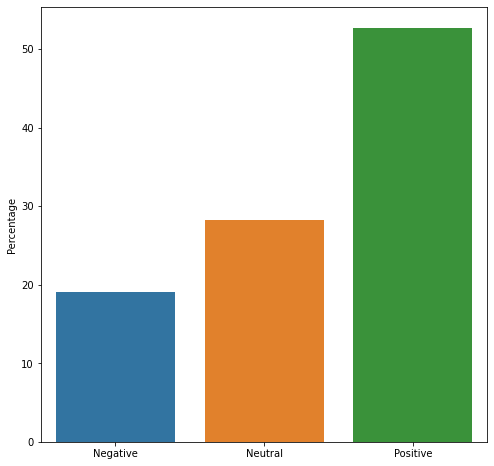

In [81]:
#https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6
#Visualization of sentiment
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [82]:
#Eliminating neutral column
df_positive_negative = df.loc[df['label'] != 0]
df_positive_negative.head()

,neg,neu,pos,compound,words,label
0,0.079,0.565,0.356,0.5994,cumming andor feeling like masturbating relatively maybe nearly two week ash sure real idk,1
1,0.127,0.549,0.325,0.5719,increase libido erection also stronger usual overall mood also nice situation used make agitated would become managable,1
2,0.165,0.773,0.061,-0.5542,context woman adding info seems mostly men report experiencing adverse effect ash case really helped anxiety every time get sensation associate take capsule use full spec type sensation go away btw one supplement help stress ash adaptogens adrenasense,-1
3,0.194,0.548,0.258,0.6597,think ash could well helpful taken withanolides morning night bed worked miracle anxiety restlessness without noticeable side effect except bit tiredness morning dose eliminated taking morning dose hour waking quality sleep better also ridiculous amount negative report mind rare get negative effect especially major one people like whine everything something working like hear recommend sensoril shoden extract stronger sedative effect,1
4,0.378,0.504,0.118,-0.7755,neck twitch sometimes get anxious started taking ashwagandha helped anxiety much awhile started become really forgetful slow stopped taking want discourage taking help anxiety experience,-1


In [83]:
print(df_positive_negative.label.value_counts())

 1    1048
-1     379
Name: label, dtype: int64


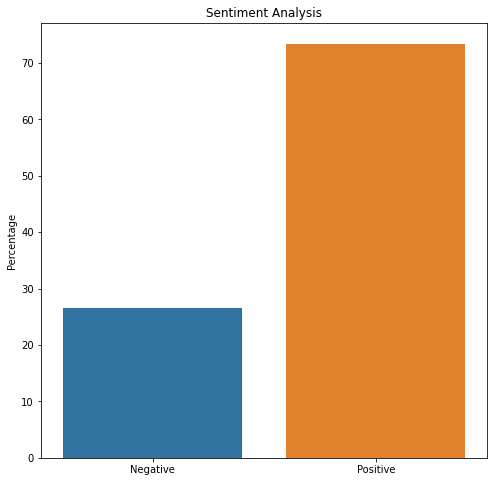

In [84]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df_positive_negative.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("Percentage")
ax.set_title("Sentiment Analysis")

plt.show()

In [85]:

#positive words in subreddit
positive_words = list(df.loc[df['label'] == 1].words)
print(positive_words)

['cumming andor feeling like masturbating relatively maybe nearly two week ash sure real idk', 'increase libido erection also stronger usual overall mood also nice situation used make agitated would become managable', 'think ash could well helpful taken withanolides morning night bed worked miracle anxiety restlessness without noticeable side effect except bit tiredness morning dose eliminated taking morning dose hour waking quality sleep better also ridiculous amount negative report mind rare get negative effect especially major one people like whine everything something working like hear recommend sensoril shoden extract stronger sedative effect', 'youtheory good suggested someone comment try nootropics depot version ksmsensorilshoden', 'ive best result pure encapsulation capsule', 'honestly think exaggerating cannot blame everything ash youre growing youre enter college workforce life naturally get anxious stressful also body almost grown teenager cannot stop thinking sex grownup th

In [86]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [87]:
positive_frequency = FreqDist(positive_words)
pos_freq = positive_frequency.most_common(20)
pos_freq

[('yes', 5),
 ('brand matter luckily indian one best cause medicinal outside consider going ksm official website look brand supply',
  2),
 ('lol', 2),
 ('hello member anyone experiencing face bloat cheek ear area also chin coz creatine taking ashwagandha anxiety well think interacting creatine viceversa many thanks advice opinion',
  2),
 ('cumming andor feeling like masturbating relatively maybe nearly two week ash sure real idk',
  1),
 ('increase libido erection also stronger usual overall mood also nice situation used make agitated would become managable',
  1),
 ('think ash could well helpful taken withanolides morning night bed worked miracle anxiety restlessness without noticeable side effect except bit tiredness morning dose eliminated taking morning dose hour waking quality sleep better also ridiculous amount negative report mind rare get negative effect especially major one people like whine everything something working like hear recommend sensoril shoden extract stronger se

In [88]:
negative_words = list(df.loc[df['label'] == -1].words)
print(negative_words)

['context woman adding info seems mostly men report experiencing adverse effect ash case really helped anxiety every time get sensation associate take capsule use full spec type sensation go away btw one supplement help stress ash adaptogens adrenasense', 'neck twitch sometimes get anxious started taking ashwagandha helped anxiety much awhile started become really forgetful slow stopped taking want discourage taking help anxiety experience', 'taking ash six month benefit noticed gym stopped november first time ever started anxiety hasn’t subsided yet definitely related ashwangdha lion mane also stopped time hasn’t ruined life still young it’s blip get', 'hey understand feeling happened ashwaghanda also anxiety take ash life isn’t ruined ok happened taken much ash taken often consistently well also left anhedonia week ash meant taken little considerable break taken sporadically take extended period time numbs everything bit feel emotion come back might take month two get back fully don’

In [89]:
negative_frequency = FreqDist(negative_words)
neg_freq = negative_frequency.most_common(20)
neg_freq

[('took mg ksm ashwagandha every single morning year couple year taken mg every day noticeable negative side effect basically best thing ever happened far reducing anxiety irritability struggled life taking every day happened forget take one day experienced one worst headache i’d ever experienced legitimately felt like someone drilling hole brain leave work way home pull side road throw got home fell asleep sleep couch lasted day happened multiple time one time went back home lunch took normal dosage thinking would stop prevent symptom strangely best analogy think extremely bad alcohol hangover eventually started weaning taking mg weekend first even decreasing normal dose half producing similar symptom mg one day mg next mg everyday nothing weekend etc gone back couple time mg one day one day stopped completely concern long term damage couldn’t find many anecdote study helping explain worried herb capacity increase gaba extent act somewhat like benzodiazepine anyone assuage concern val

In [90]:
Pos_words = [str(p) for p in pos_freq]
Pos_words_string = ' , '.join(Pos_words)

In [91]:
Neg_words = [str(n) for n in neg_freq]
Neg_words_string = ' , '.join(Neg_words)

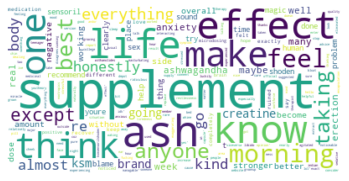

<Figure size 1440x1440 with 0 Axes>

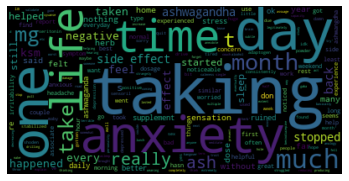

<Figure size 1440x1440 with 0 Axes>

In [92]:
wordcloud_positive = WordCloud(background_color='white').generate(Pos_words_string)
wordcloud_negative = WordCloud().generate(Neg_words_string)

plt.imshow(wordcloud_positive, interpolation = 'bilinear')
plt.axis("off")
plt.figure(figsize=(20, 20))
plt.show()

plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20, 20))
plt.show()

In [93]:
for submission in reddit.subreddit("all").search("ashwagandha", sort="comments", limit=None):
    print(submission.title)

NA-E Official PvP Server | Valhalla
Is there a noot or supplement that caused you long-term side effect(s) or perma
Ashwagandha isn't the harmless herb I thought it was man fuck
[Progress] My fitness journey since September 2012
Hi r/covidlonghaulers! I’m the one who suffered a suspected case of MERS Coronavirus in 2017, dealt with long-hauler like symptoms and recovered 100%! AMA!
Liver Injury due to Ashwagandha. A Case Series from Iceland and the U.S. Drug-Induced Liver Injury Network.
Reddit AMA | In-House Lab Edition
DNA tests are totally worth it.
Examine updates: Lots of boner pills
Ashwagandha and its insane effect variability
First impressions of testosterone
Beat supplement for anxiety and constant worrying?
Have you guys ever tried just taking… nothing?
Personal anti-anxiety favorites?
Are there any supplements that help women with low libido?
Supplements that increase libido/drive?
Ashwagandha - More BAD than good
Let's talk IODINE: The Essential Nootropic. A 7 Month Review.

In [94]:
newest_posts = list(reddit.subreddit('ashwagandha').new(limit=10))

In [95]:
len(newest_posts)

10

In [96]:
newest_posts[0].created_utc

1650468230.0

In [97]:
!pip install sklearn

In [98]:
!pip install transformers

In [99]:
!pip install tfidf

In [100]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import random
import numpy as np


## Topic modeling
- statistical modeling that will allow us to discover abstract "topics" 
- unsupervised machine learning technique allowing us to scan reddit, detect word and phrase patterns within them, cluster word groups and similar exppressions that characterize the subreddit
- LDA - Latent Dirichlet Allocation (LDA) informally known as "bag of words" because the word order does not matter

In [101]:
!pip install -r requirements.txt

In [102]:
import requests

response = requests.get(
    "https://www.reddit.com/api/v1/scopes.json",
    headers={"User-Agent": "fetch-scopes by u/bboe"},
)

for scope, data in sorted(response.json().items()):
    print(f"{scope:>18s}  {data['description']}")

           account  Update preferences and related account information. Will not have access to your email or password.
    adsconversions  Post conversion events through my account.
          creddits  Spend my reddit gold creddits on giving gold to other users.
              edit  Edit and delete my comments and submissions.
             flair  Select my subreddit flair. Change link flair on my submissions.
           history  Access my voting history and comments or submissions I've saved or hidden.
          identity  Access my reddit username and signup date.
        livemanage  Manage settings and contributors of live threads I contribute to.
         modconfig  Manage the configuration, sidebar, and CSS of subreddits I moderate.
   modcontributors  Add/remove users to approved user lists and ban/unban or mute/unmute users from subreddits I moderate.
          modflair  Manage and assign flair in subreddits I moderate.
            modlog  Access the moderation log in subreddits I

In [103]:
import praw

def anonymous():
    r = praw.Reddit(
        user_agent=credentials.user_agent,
        client_id=credentials.client_id,
        client_secret=credentials.client_secret,
    )
    return r

def login(r=None):
    new_r = praw.Reddit(
        user_agent=credentials.user_agent,
        client_id=credentials.client_id,
        client_secret=credentials.client_secret,
        refresh_token=APP_REFRESH,
    )
    if r:
        r.__dict__.clear()
        r.__dict__.update(new_r.__dict__)
    return new_r


In [104]:
top_post = []
subreddit = reddit.subreddit('ashwagandha')
for post in subreddit.hot(limit=None):
    top_post.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
top_posts = pd.DataFrame(top_post,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

In [105]:
top_posts

title  \
0                                                                                                                            Libido and Ash   
1                                                                                                           anxiety, twitching, ashwagandha   
2                                                                 What is there a difference in the effect of these Ashwagandha supplements   
3                                                                                                                         Suggested brands?   
4                                                                                                               Ashwagandha ruined my life.   
..                                                                                                                                      ...   
789                                                                                                            Does anyone grow Ashwaganda?   
790  Anyone think 600mg is enough. I read that it a good dose for anxiety and stress. But every dose on amazon seems to be like 1500-2000mg   
791           Anyone ever had the Ashwagandha capsule open in your lower throat/upper chest? (Sorry, obviously not good with anatomy haha).   
792                                                                       I have to take aspirin. Can I take it together with ashwhaghanda?   
793                                       According to scientific studies, main benefits of ashwagandha are reduction of anxiety and stress   

     score      id    subreddit  \
0        8  u7yzrh  ASHWAGANDHA   
1        4  u2up48  ASHWAGANDHA   
2        5  u20zi3  ASHWAGANDHA   
3        6  u0srwt  ASHWAGANDHA   
4        7  tyljyf  ASHWAGANDHA   
..     ...     ...          ...   
789      4  d19d7m  ASHWAGANDHA   
790      6  d03v6i  ASHWAGANDHA   
791      3  cml7w7  ASHWAGANDHA   
792      1  c032iz  ASHWAGANDHA   
793      3  9seekm  ASHWAGANDHA   

                                                                                                         url  \
0                                       https://www.reddit.com/r/ASHWAGANDHA/comments/u7yzrh/libido_and_ash/   
1                        https://www.reddit.com/r/ASHWAGANDHA/comments/u2up48/anxiety_twitching_ashwagandha/   
2    https://www.reddit.com/r/ASHWAGANDHA/comments/u20zi3/what_is_there_a_difference_in_the_effect_of_these/   
3                                     https://www.reddit.com/r/ASHWAGANDHA/comments/u0srwt/suggested_brands/   
4                           https://www.reddit.com/r/ASHWAGANDHA/comments/tyljyf/ashwagandha_ruined_my_life/   
..                                                                                                       ...   
789                        https://www.reddit.com/r/ASHWAGANDHA/comments/d19d7m/does_anyone_grow_ashwaganda/   
790      https://www.reddit.com/r/ASHWAGANDHA/comments/d03v6i/anyone_think_600mg_is_enough_i_read_that_it_a/   
791    https://www.reddit.com/r/ASHWAGANDHA/comments/cml7w7/anyone_ever_had_the_ashwagandha_capsule_open_in/   
792      https://www.reddit.com/r/ASHWAGANDHA/comments/c032iz/i_have_to_take_aspirin_can_i_take_it_together/   
793                                               https://examine.com/supplements/ashwagandha/#effect-matrix   

     num_comments  \
0              12   
1               8   
2               0   
3               4   
4              20   
..            ...   
789             4   
790             8   
791             4   
792             0   
793             0   

                                                                                                                                                                                                                                                                                                                                                                                                              

In [106]:
top_posts.title[0:]

0                                                                                                                              Libido and Ash
1                                                                                                             anxiety, twitching, ashwagandha
2                                                                   What is there a difference in the effect of these Ashwagandha supplements
3                                                                                                                           Suggested brands?
4                                                                                                                 Ashwagandha ruined my life.
                                                                        ...                                                                  
789                                                                                                              Does anyone grow Ashwaganda?
790   

In [107]:
submission = reddit.submission(id=top_posts.id[0])
submission

Submission(id='u7yzrh')

In [108]:
#checking total number of comments for one of the posts
submission = reddit.submission("u7yzrh")
comments = submission.comments.replace_more(limit=None)
comments = submission.comments.list()
print(submission.num_comments) 
print(len(comments))

12
12


In [109]:
#cleaning the date time stamp
import datetime
top_comment = []
for comment in comments:
    id = comment.id
    create = datetime.datetime.fromtimestamp(comment.created)
    text = comment.body
    top_comment.append([id,create,text,])
df = pd.DataFrame(top_comment,columns=['id','created','text'])
# See the head now
df


,id,created,text
0,i5jt7sf,2022-04-20 17:46:45,"I have been cumming and/or feeling like masturbating relatively more, it's been maybe nearly two or so weeks on Ash.. I'm not sure this is real or just... Idk"
1,i5lae99,2022-04-21 01:52:13,For me it increases the libido. Erections are also stronger than usual. Overall mood is also nice. The situations that used to make me agitated would become managable
2,i5l3m7q,2022-04-21 00:20:24,Is it spring time for you too?
3,i5ltky2,2022-04-21 05:58:32,to me the first few weeks yes libido is increased but as you progress further like 3 months in your libido goes down really low \n\n\nbut to me increasing the dose by 500mg ever 3 weeks kinda increase it back up but will vary on person to person
4,i5notz2,2022-04-21 13:43:15,😲 wow sounds like something in it really worked. What kinds of situations have become less triggering to you? (And how long did it kinda take for those effects to become noticeable?)
5,i5noj3p,2022-04-21 13:41:18,"No, fall is just starting, why?"
6,i5nocyn,2022-04-21 13:40:13,"That's strange....about the post 3month decrease. First time I read something like that. You mean decreased to ""normalcy"" or to ever lower levels like never before?"
7,i5nr66l,2022-04-21 13:58:35,I and many other animals and beasts get raging boners come springtime. If it were springtime for you it could have been a partial explanation. \n\nEnjoy your boner and share it every now and then
8,i5opgv6,2022-04-21 18:08:58,"wdym normalcy, most people when they are stressed they resort to beating their bush, but because ashwaganda is also a anti anxiety and anti depressant many people also feel numb when taking it for prolonged periods.\n\n\nto me i take it to solve anger issues so far I've taken 2 test for testosterone 1 when i was during my break with ash and 2nd was during when i was back on \n\n1st time was 12.6nmol/l \n\n\n2nd time was 13.2nmol/l"
9,i5pv5ii,2022-04-22 00:17:26,"Seasons have never affected my libido..and thanks, I already kinda do lol"


In [110]:
top_comment = []
for i in range(len(comments)):
      print(comments[i].id,comments[i].body)
      top_comment.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
top_posts = pd.DataFrame(top_post,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

i5jt7sf I have been cumming and/or feeling like masturbating relatively more, it's been maybe nearly two or so weeks on Ash.. I'm not sure this is real or just... Idk
i5lae99 For me it increases the libido. Erections are also stronger than usual. Overall mood is also nice. The situations that used to make me agitated would become managable
i5l3m7q Is it spring time for you too?
i5ltky2 to me the first few weeks yes libido is increased but as you progress further like 3 months in your libido goes down really low  


but to me increasing the dose by 500mg ever 3 weeks kinda increase it back up but will vary on person to person
i5notz2 😲 wow sounds like something in it really worked. What kinds of situations have become less triggering to you? (And how long did it kinda take for those effects to become noticeable?)
i5noj3p No, fall is just starting, why?
i5nocyn That's strange....about the post 3month decrease. First time I read something like that. You mean decreased to "normalcy" or to 

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import spacy
nlp = spacy.load('en_core_web_sm')

In [112]:
import re
punct = string.punctuation
# nlp.Defaults.stop_words |= {"nan","brigade ","new","moderna","cyprus","medium","alle","black","solo","husband","uae",
#                             "rep", "lmc", "nhs"}
def clean(text):
    try:
        text = re.sub(r"http\S+", "", text)
        text = text.lower()  #Convert text in lower case
        text = text.replace("[^a-zA-Z#]", " ")
        punc_removed = [char for char in text if char not in punct]  #Removing Punctuations
        punc_removed_join = ''.join(punc_removed)

        doc= nlp(punc_removed_join)
        text_out = [token.lemma_ for token in doc if token.is_stop == False and token.is_alpha and len(token)>2]
        txt = ' '.join(text_out)
    except:
        txt = ''
    return txt

In [113]:
df['text'] = df['text'].apply(clean)
df.head()

,id,created,text
0,i5jt7sf,2022-04-20 17:46:45,cumme andor feel like masturbate relatively maybe nearly week ash sure real idk
1,i5lae99,2022-04-21 01:52:13,increase libido erection strong usual overall mood nice situation agitated managable
2,i5l3m7q,2022-04-21 00:20:24,spring time
3,i5ltky2,2022-04-21 05:58:32,week yes libido increase progress like month libido go low increase dose week kinda increase vary person person
4,i5notz2,2022-04-21 13:43:15,wow sound like work kind situation triggering long kinda effect noticeable


In [114]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


def polarity(text):
    pol = sid.polarity_scores(text)
    return pol
df['polarity'] = df['text'].apply(polarity)  #polarity checking
df['compound']  = df['polarity'].apply(lambda score_dict: score_dict['compound'])

df['sentiment'] = df['compound'].apply(lambda x: "Positive" if x>0 else("Negative" if x<0 else "Neutral") )
print("polarity checked successfull")

polarity checked successfull


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/christinetran/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [115]:
df

,id,created,text,polarity,compound,sentiment
0,i5jt7sf,2022-04-20 17:46:45,cumme andor feel like masturbate relatively maybe nearly week ash sure real idk,"{'neg': 0.086, 'neu': 0.617, 'pos': 0.296, 'compound': 0.5267}",0.5267,Positive
1,i5lae99,2022-04-21 01:52:13,increase libido erection strong usual overall mood nice situation agitated managable,"{'neg': 0.163, 'neu': 0.38, 'pos': 0.457, 'compound': 0.6597}",0.6597,Positive
2,i5l3m7q,2022-04-21 00:20:24,spring time,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral
3,i5ltky2,2022-04-21 05:58:32,week yes libido increase progress like month libido go low increase dose week kinda increase vary person person,"{'neg': 0.075, 'neu': 0.393, 'pos': 0.532, 'compound': 0.8957}",0.8957,Positive
4,i5notz2,2022-04-21 13:43:15,wow sound like work kind situation triggering long kinda effect noticeable,"{'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'compound': 0.8658}",0.8658,Positive
5,i5noj3p,2022-04-21 13:41:18,fall start,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral
6,i5nocyn,2022-04-21 13:40:13,strangeabout post decrease time read like mean decrease normalcy low level like,"{'neg': 0.13, 'neu': 0.559, 'pos': 0.311, 'compound': 0.4404}",0.4404,Positive
7,i5nr66l,2022-04-21 13:58:35,animal beast rage boner come springtime springtime partial explanation enjoy boner share,"{'neg': 0.2, 'neu': 0.5, 'pos': 0.3, 'compound': 0.2023}",0.2023,Positive
8,i5opgv6,2022-04-21 18:08:58,wdym normalcy people stress resort beat bush ashwaganda anti anxiety anti depressant people feel numb take prolonged period solve anger issue far take test testosterone break ash time time,"{'neg': 0.438, 'neu': 0.517, 'pos': 0.044, 'compound': -0.9325}",-0.9325,Negative
9,i5pv5ii,2022-04-22 00:17:26,season affect libidoand thanks kinda lol,"{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.6605}",0.6605,Positive


In [116]:
def token(text):
    removal=['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE']  #get Noun phrase
    tok = []
    doc= nlp(text)
    for token in doc:
        if token.is_stop == False and token.is_alpha and len(token)>2 and token.pos_ not in removal:
            lemma = token.lemma_            #lemmatization of token word
            tok.append(lemma)
            
    return tok

df['token'] = df['text'].apply(token)
df.head()

,id,created,text,polarity,compound,sentiment,token
0,i5jt7sf,2022-04-20 17:46:45,cumme andor feel like masturbate relatively maybe nearly week ash sure real idk,"{'neg': 0.086, 'neu': 0.617, 'pos': 0.296, 'compound': 0.5267}",0.5267,Positive,"[cumme, andor, feel, like, masturbate, week, ash, sure, real, idk]"
1,i5lae99,2022-04-21 01:52:13,increase libido erection strong usual overall mood nice situation agitated managable,"{'neg': 0.163, 'neu': 0.38, 'pos': 0.457, 'compound': 0.6597}",0.6597,Positive,"[increase, libido, erection, strong, usual, overall, mood, nice, situation, agitate, managable]"
2,i5l3m7q,2022-04-21 00:20:24,spring time,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,"[spring, time]"
3,i5ltky2,2022-04-21 05:58:32,week yes libido increase progress like month libido go low increase dose week kinda increase vary person person,"{'neg': 0.075, 'neu': 0.393, 'pos': 0.532, 'compound': 0.8957}",0.8957,Positive,"[week, yes, libido, increase, progress, like, month, libido, low, increase, dose, week, kinda, increase, vary, person, person]"
4,i5notz2,2022-04-21 13:43:15,wow sound like work kind situation triggering long kinda effect noticeable,"{'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'compound': 0.8658}",0.8658,Positive,"[wow, sound, like, work, kind, situation, trigger, long, kinda, effect, noticeable]"


In [117]:
val = []
for i in range(len(df)):
    val.append(df['token'][i])

In [118]:
# import gensim library
from gensim import models,corpora
dictionary = corpora.Dictionary(val)
dictionary

In [119]:
bow_corpus = [dictionary.doc2bow(doc) for doc in val]
# bow_corpus

In [120]:
import gensim
lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics = 10, id2word = dictionary, passes = 10,workers = 2)
lda_model

In [121]:
# Printing Topics and Its keywords
num_topics = 6
for i in range(num_topics):
    tt = lda_model.get_topic_terms(i,10)
    topic = ', '.join([dictionary[pair[0]] for pair in tt])
    print("TOPIC: {} \nTOPIC WORDS : {}".format(i+1, topic ))
    print()

TOPIC: 1 
TOPIC WORDS : like, ash, feel, sure, andor, real, masturbate, cumme, idk, bother

TOPIC: 2 
TOPIC WORDS : brofist, spring, time, start, thank, kinda, like, reply, fall, bother

TOPIC: 3 
TOPIC WORDS : brofist, fall, spring, time, thank, kinda, start, like, reply, bother

TOPIC: 4 
TOPIC WORDS : time, anti, people, increase, libido, erection, usual, mood, managable, overall

TOPIC: 5 
TOPIC WORDS : increase, week, libido, person, month, dose, low, progress, vary, like

TOPIC: 6 
TOPIC WORDS : boner, springtime, enjoy, come, share, partial, explanation, rage, beast, animal



In [122]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.067104  0.187608       1        1  31.959264
4      0.100758 -0.110178       2        1  15.087824
8      0.068891  0.005284       3        1  11.861869
0      0.014512 -0.054287       4        1  10.915516
5     -0.188314  0.010892       5        1  10.681920
7     -0.002388 -0.054262       6        1   9.802641
9     -0.036076 -0.035256       7        1   6.610480
6     -0.010902  0.017894       8        1   1.321813
1     -0.006793  0.016153       9        1   0.879336
2     -0.006793  0.016153      10        1   0.879336, topic_info=          Term     Freq     Total Category  logprob  loglift
12    increase  3.00000  3.000000  Default  30.0000  30.0000
22        time  3.00000  3.000000  Default  29.0000  29.0000
50       boner  1.00000  1.000000  Default  28.0000  28.0000
57  springtime  1.00000  1.000000  Default  27.0000  27.0000
5         like  3.00000  3.000000  Default  26.0000  26.0000
..         ...      ...       ...      ...      ...      ...
63       break  0.01169  1.256851  Topic10  -4.4427   0.0561
50       boner  0.01169  1.640857  Topic10  -4.4427  -0.2105
49       beast  0.01169  1.052047  Topic10  -4.4427   0.2340
62        beat  0.01169  1.256853  Topic10  -4.4427   0.0561
68      people  0.01169  2.050466  Topic10  -4.4427  -0.4333

[463 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
10        1  0.795635  agitate
0         4  0.964664    andor
58        1  0.795638    anger
48        5  0.950528   animal
59        1  0.975385     anti
...     ...       ...      ...
9         2  0.421195     week
9         4  0.421195     week
37        6  0.969660     work
38        6  0.969660      wow
30        2  0.883361      yes

[91 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 9, 1, 6, 8, 10, 7, 2, 3])

## Scraping large amounts of reddit data with Pushshift

In [123]:
#data retrieval with pmaw and export as csv file
!pip install pmaw pandas

In [124]:
import pandas as pd
from pmaw import PushshiftAPI
api = PushshiftAPI()

In [125]:
#pmaw only allows working with date in epoch time format
import datetime as dt
before = int(dt.datetime(2021,2,1,0,0).timestamp())
after = int(dt.datetime(2020,12,1,0,0).timestamp())

In [126]:
subreddit="ashwagandha"
limit=100000
comments = api.search_comments(subreddit=subreddit, limit=limit, before=before, after=after)
print(f'Retrieved {len(comments)} comments from Pushshift')

Retrieved 485 comments from Pushshift


In [127]:
comments_df = pd.DataFrame(comments)
# preview the comments data
comments_df.head(5)

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,body,collapsed_because_crowd_control,comment_type,created_utc,gildings,id,is_submitter,link_id,locked,no_follow,parent_id,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags
0,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],"Ashwagandha boost testosterone and it did same in my case ( i gave up because of dht issue ) otherwise its one of best herb i can say for t level , libido and anxiety too, gyno lumps i never ever heard",None,None,1607337094,{},gexib2l,False,t3_k82jpu,False,True,t1_gexggsr,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexib2l/,1607337104,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]
1,[],None,Dkay___47,None,None,[],None,None,None,text,t2_8vxl9w21,False,False,[],Look up ashawaganda and gyno a few ppl have gotten it,None,None,1607335027,{},gexggsr,False,t3_k82jpu,False,True,t1_gexendl,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexggsr/,1607335038,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]
2,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],"Start working within first week, its not sedative like valerian",None,None,1607334057,{},gexfljj,False,t3_k5dik3,False,True,t3_k5dik3,/r/ASHWAGANDHA/comments/k5dik3/how_long_does_it_take_to_kick_in/gexfljj/,1607334068,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]
3,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],Gyno lumps?? I have heard first time with ashwagandha,None,None,1607333018,{},gexendl,False,t3_k82jpu,False,True,t1_gew5fxx,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexendl/,1607333028,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]
4,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],"M not sure about hair loss but it bosst testosterone and libido both , you ll get pretty hard erection with some weight lifting exercise and this herb, also helped me a lot about anxiety",None,None,1607332865,{},gexeico,False,t3_k82jpu,False,True,t3_k82jpu,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexeico/,1607332876,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]


In [128]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   all_awardings                    485 non-null    object
 1   associated_award                 0 non-null      object
 2   author                           485 non-null    object
 3   author_flair_background_color    11 non-null     object
 4   author_flair_css_class           0 non-null      object
 5   author_flair_richtext            474 non-null    object
 6   author_flair_template_id         0 non-null      object
 7   author_flair_text                0 non-null      object
 8   author_flair_text_color          11 non-null     object
 9   author_flair_type                474 non-null    object
 10  author_fullname                  474 non-null    object
 11  author_patreon_flair             474 non-null    object
 12  author_premium                   474

In [129]:
comments_df2 = pd.DataFrame(comments_df,columns=['id','body'])
comments_df2.head()

,id,body
0,gexib2l,"Ashwagandha boost testosterone and it did same in my case ( i gave up because of dht issue ) otherwise its one of best herb i can say for t level , libido and anxiety too, gyno lumps i never ever heard"
1,gexggsr,Look up ashawaganda and gyno a few ppl have gotten it
2,gexfljj,"Start working within first week, its not sedative like valerian"
3,gexendl,Gyno lumps?? I have heard first time with ashwagandha
4,gexeico,"M not sure about hair loss but it bosst testosterone and libido both , you ll get pretty hard erection with some weight lifting exercise and this herb, also helped me a lot about anxiety"


In [130]:
comments_df.to_csv('./ashwagandha_comments.csv', header=True, index=False, columns=list(comments_df.axes[1]))

In [131]:
trp_sub = pd.read_csv('ashwagandha_comments.csv')

In [132]:
from gensim.utils import simple_preprocess

def tokenizer(texts):
    for text in texts:yield(simple_preprocess(text, deacc=True))

tokens_list = list(tokenizer(data))

In [133]:
#Creating N-grams with Gensim
bigram = gensim.models.Phrases(tokens_list, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[tokens_list], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [134]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
!spacy download en_core_web_sm
import en_core_web_sm
nlp = en_core_web_sm.load()
def remove_stopwords(texts):
    return [[word for word in doc if word not in stop] for doc in  
    texts]
      
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for doc in texts:
        joined = nlp(" ".join(doc)) 
        texts_out.append([token.lemma_ for token in joined if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christinetran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 5.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import spacy
nlp = spacy.load('en_core_web_sm')

In [136]:
import re
punct = string.punctuation
# nlp.Defaults.stop_words |= {"nan","brigade ","new","moderna","cyprus","medium","alle","black","solo","husband","uae",
#                             "rep", "lmc", "nhs"}
def clean(text):
    try:
        text = re.sub(r"http\S+", "", text)
        text = text.lower()  #Convert text in lower case
        text = text.replace("[^a-zA-Z#]", " ")
        punc_removed = [char for char in text if char not in punct]  #Removing Punctuations
        punc_removed_join = ''.join(punc_removed)

        doc= nlp(punc_removed_join)
        text_out = [token.lemma_ for token in doc if token.is_stop == False and token.is_alpha and len(token)>2]
        txt = ' '.join(text_out)
    except:
        txt = ''
    return txt

In [137]:
comments_df['body'] = comments_df['body'].apply(clean)
comments_df.head()

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,body,collapsed_because_crowd_control,comment_type,created_utc,gildings,id,is_submitter,link_id,locked,no_follow,parent_id,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags
0,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],ashwagandha boost testosterone case give dht issue good herb level libido anxiety gyno lumps hear,None,None,1607337094,{},gexib2l,False,t3_k82jpu,False,True,t1_gexggsr,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexib2l/,1607337104,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]
1,[],None,Dkay___47,None,None,[],None,None,None,text,t2_8vxl9w21,False,False,[],look ashawaganda gyno ppl get,None,None,1607335027,{},gexggsr,False,t3_k82jpu,False,True,t1_gexendl,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexggsr/,1607335038,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]
2,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],start work week sedative like valerian,None,None,1607334057,{},gexfljj,False,t3_k5dik3,False,True,t3_k5dik3,/r/ASHWAGANDHA/comments/k5dik3/how_long_does_it_take_to_kick_in/gexfljj/,1607334068,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]
3,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],gyno lumps hear time ashwagandha,None,None,1607333018,{},gexendl,False,t3_k82jpu,False,True,t1_gew5fxx,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexendl/,1607333028,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]
4,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],sure hair loss bosst testosterone libido pretty hard erection weight lift exercise herb help lot anxiety,None,None,1607332865,{},gexeico,False,t3_k82jpu,False,True,t3_k82jpu,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexeico/,1607332876,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]


In [138]:
def token(body):
    removal=['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE']  #get Noun phrase
    tok = []
    doc= nlp(body)
    for token in doc:
        if token.is_stop == False and token.is_alpha and len(token)>2 and token.pos_ not in removal:
            lemma = token.lemma_            #lemmatization of token word
            tok.append(lemma)
            
    return tok

comments_df['token'] = comments_df['body'].apply(token)
comments_df.head()

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,body,collapsed_because_crowd_control,comment_type,created_utc,gildings,id,is_submitter,link_id,locked,no_follow,parent_id,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,token
0,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],ashwagandha boost testosterone case give dht issue good herb level libido anxiety gyno lumps hear,None,None,1607337094,{},gexib2l,False,t3_k82jpu,False,True,t1_gexggsr,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexib2l/,1607337104,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[],"[ashwagandha, boost, testosterone, case, dht, issue, good, herb, level, libido, anxiety, gyno, lumps, hear]"
1,[],None,Dkay___47,None,None,[],None,None,None,text,t2_8vxl9w21,False,False,[],look ashawaganda gyno ppl get,None,None,1607335027,{},gexggsr,False,t3_k82jpu,False,True,t1_gexendl,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexggsr/,1607335038,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[],"[look, ashawaganda, gyno, ppl]"
2,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],start work week sedative like valerian,None,None,1607334057,{},gexfljj,False,t3_k5dik3,False,True,t3_k5dik3,/r/ASHWAGANDHA/comments/k5dik3/how_long_does_it_take_to_kick_in/gexfljj/,1607334068,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[],"[start, work, week, sedative, like, valerian]"
3,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],gyno lumps hear time ashwagandha,None,None,1607333018,{},gexendl,False,t3_k82jpu,False,True,t1_gew5fxx,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexendl/,1607333028,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[],"[gyno, lumps, hear, time, ashwagandha]"
4,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],sure hair loss bosst testosterone libido pretty hard erection weight lift exercise herb help lot anxiety,None,None,1607332865,{},gexeico,False,t3_k82jpu,False,True,t3_k82jpu,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexeico/,1607332876,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[],"[sure, hair, loss, bosst, testosterone, libido, hard, erection, weight, lift, exercise, herb, help, lot, anxiety]"


In [139]:
val2 = []
for i in range(len(comments_df)):
    val2.append(comments_df['token'][i])

In [140]:
# import gensim library
from gensim import models,corpora
dictionary = corpora.Dictionary(val2)
dictionary

In [141]:
bow_corpus = [dictionary.doc2bow(doc) for doc in val2]
# bow_corpus

In [142]:
#Process gensim model for topic identification
import gensim
lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics = 10, id2word = dictionary, passes = 10,workers = 2)
lda_model

In [143]:
# Printing Topics and Its keywords - Top 10 topics related to text around ashwagandha - subreddit
num_topics = 10
for i in range(num_topics):
    tt = lda_model.get_topic_terms(i,10)
    topic = ', '.join([dictionary[pair[0]] for pair in tt])
    print("TOPIC: {} \nTOPIC WORDS : {}".format(i+1, topic ))
    print()

TOPIC: 1 
TOPIC WORDS : review, day, try, work, study, good, ssris, ashwagandha, people, product

TOPIC: 2 
TOPIC WORDS : feel, effect, day, ashwagandha, month, work, yeah, help, know, extract

TOPIC: 3 
TOPIC WORDS : ashwagandha, like, effect, extract, know, mean, lot, root, help, hair

TOPIC: 4 
TOPIC WORDS : delete, anxiety, ash, like, experience, look, start, relief, work, think

TOPIC: 5 
TOPIC WORDS : thank, ashwagandha, india, know, people, try, think, buy, product, standard

TOPIC: 6 
TOPIC WORDS : week, ashwagandha, day, try, help, anxiety, boost, notice, experience, think

TOPIC: 7 
TOPIC WORDS : sensoril, version, like, ashwagandha, think, effect, dose, check, gaba, shoden

TOPIC: 8 
TOPIC WORDS : think, anxiety, ashwagandha, like, work, find, want, thing, trip, feel

TOPIC: 9 
TOPIC WORDS : like, root, good, extract, ashwagandha, day, feel, stress, sleep, think

TOPIC: 10 
TOPIC WORDS : kratom, like, ash, work, ashwagandha, time, shoden, find, sleep, feel



In [144]:
#Visualize the topics

import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.065169 -0.025405       1        1  15.108814
2     -0.063323  0.030092       2        1  12.987237
9     -0.045297 -0.016678       3        1  12.187276
6     -0.100136  0.046536       4        1  12.162490
5     -0.045365 -0.064274       5        1  11.619714
7      0.074745 -0.077356       6        1   9.247524
0      0.117818  0.004212       7        1   9.092604
3      0.072002 -0.081173       8        1   6.835778
4      0.083392  0.157462       9        1   5.538271
1     -0.028668  0.026584      10        1   5.220292, topic_info=           Term       Freq      Total Category  logprob  loglift
350     version  28.000000  28.000000  Default  30.0000  30.0000
98         feel  54.000000  54.000000  Default  29.0000  29.0000
72       effect  49.000000  49.000000  Default  28.0000  28.0000
146         day  55.000000  55.000000  Default  27.0000  27.0000
347    sensoril  43.000000  43.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
80        sleep   2.066093  33.399415  Topic10  -5.1545   0.1697
5          good   1.961665  53.744574  Topic10  -5.2063  -0.3578
173   recommend   1.566013  19.159541  Topic10  -5.4316   0.4483
692  medication   1.457857   5.935435  Topic10  -5.5031   1.5486
334        want   1.449716  26.968689  Topic10  -5.5087   0.0293

[702 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
728       2  0.643145     ability
728      10  0.321572     ability
42        2  0.624573    abstract
1250      3  0.820830  accessible
540       6  0.637229     acrylic
...     ...       ...         ...
698       5  0.091113         yes
698       9  0.091113         yes
698      10  0.182226         yes
582       6  0.637229        yoga
1648      1  0.809971    zolpidem

[1339 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 10, 7, 6, 8, 1, 4, 5, 2])

In [145]:
#data retrieval with pmaw and export as csv file
!pip install pmaw pandas

In [146]:
import pandas as pd
from pmaw import PushshiftAPI
api = PushshiftAPI()

In [147]:
#pmaw only allows working with date in epoch time format
import datetime as dt
before = int(dt.datetime(2021,2,1,0,0).timestamp())
after = int(dt.datetime(2020,12,1,0,0).timestamp())

In [148]:
# (Podolak, 2021) How to gather a lot of reddit data with ease
subreddit="ashwagandha"
limit=100000
comments = api.search_comments(subreddit=subreddit, limit=limit, before=before, after=after)
print(f'Retrieved {len(comments)} comments from Pushshift')

Retrieved 485 comments from Pushshift


In [149]:
comments_df = pd.DataFrame(comments)
# preview the comments data
comments_df.head(5)

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,body,collapsed_because_crowd_control,comment_type,created_utc,gildings,id,is_submitter,link_id,locked,no_follow,parent_id,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags
0,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],"Ashwagandha boost testosterone and it did same in my case ( i gave up because of dht issue ) otherwise its one of best herb i can say for t level , libido and anxiety too, gyno lumps i never ever heard",None,None,1607337094,{},gexib2l,False,t3_k82jpu,False,True,t1_gexggsr,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexib2l/,1607337104,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]
1,[],None,Dkay___47,None,None,[],None,None,None,text,t2_8vxl9w21,False,False,[],Look up ashawaganda and gyno a few ppl have gotten it,None,None,1607335027,{},gexggsr,False,t3_k82jpu,False,True,t1_gexendl,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexggsr/,1607335038,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]
2,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],"Start working within first week, its not sedative like valerian",None,None,1607334057,{},gexfljj,False,t3_k5dik3,False,True,t3_k5dik3,/r/ASHWAGANDHA/comments/k5dik3/how_long_does_it_take_to_kick_in/gexfljj/,1607334068,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]
3,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],Gyno lumps?? I have heard first time with ashwagandha,None,None,1607333018,{},gexendl,False,t3_k82jpu,False,True,t1_gew5fxx,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexendl/,1607333028,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]
4,[],None,Garryjogs,None,None,[],None,None,None,text,t2_8pia1w5o,False,False,[],"M not sure about hair loss but it bosst testosterone and libido both , you ll get pretty hard erection with some weight lifting exercise and this herb, also helped me a lot about anxiety",None,None,1607332865,{},gexeico,False,t3_k82jpu,False,True,t3_k82jpu,/r/ASHWAGANDHA/comments/k82jpu/ashwagandha_and_hair_loss/gexeico/,1607332876,1,True,False,ASHWAGANDHA,t5_qjadm,None,0,[]


In [150]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   all_awardings                    485 non-null    object
 1   associated_award                 0 non-null      object
 2   author                           485 non-null    object
 3   author_flair_background_color    11 non-null     object
 4   author_flair_css_class           0 non-null      object
 5   author_flair_richtext            474 non-null    object
 6   author_flair_template_id         0 non-null      object
 7   author_flair_text                0 non-null      object
 8   author_flair_text_color          11 non-null     object
 9   author_flair_type                474 non-null    object
 10  author_fullname                  474 non-null    object
 11  author_patreon_flair             474 non-null    object
 12  author_premium                   474

In [151]:
comments_df2 = pd.DataFrame(comments_df,columns=['id','body'])
comments_df2.head()

,id,body
0,gexib2l,"Ashwagandha boost testosterone and it did same in my case ( i gave up because of dht issue ) otherwise its one of best herb i can say for t level , libido and anxiety too, gyno lumps i never ever heard"
1,gexggsr,Look up ashawaganda and gyno a few ppl have gotten it
2,gexfljj,"Start working within first week, its not sedative like valerian"
3,gexendl,Gyno lumps?? I have heard first time with ashwagandha
4,gexeico,"M not sure about hair loss but it bosst testosterone and libido both , you ll get pretty hard erection with some weight lifting exercise and this herb, also helped me a lot about anxiety"


In [152]:
comments_df.to_csv('./ashwagandha_comments.csv', header=True, index=False, columns=list(comments_df.axes[1]))

In [153]:
trp_sub = pd.read_csv('ashwagandha_comments.csv')

In [154]:
import pandas as pd
from nltk.corpus import stopwords
import re
stop = set(stopwords.words("english"))

In [155]:
def preprocess(text):
    text_input = re.sub('[^a-zA-Z1-9]+', ' ', str(text))
    output = re.sub(r'\d+', '',text_input)
    return output.lower().strip()

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

In [156]:
comments_df2['body'] = comments_df2.body.map(preprocess)
comments_df2['body'] = comments_df2.body.map(remove_stopwords)

In [157]:
#cleaned comments from punctuation, letters, stopwords
comments_df2

,id,body
0,gexib2l,ashwagandha boost testosterone case gave dht issue otherwise one best herb say level libido anxiety gyno lumps never ever heard
1,gexggsr,look ashawaganda gyno ppl gotten
2,gexfljj,start working within first week sedative like valerian
3,gexendl,gyno lumps heard first time ashwagandha
4,gexeico,sure hair loss bosst testosterone libido get pretty hard erection weight lifting exercise herb also helped lot anxiety
...,...,...
480,gl2hvdt,different types ashwaghanda let know ksm sensoril shoden might worth trying another variety
481,gl0uuds,agree tried best brands market cbd oil well go well wife
482,gl0q3pz,agree wife spent last year trying cbd oil results definitely either also thought wanted cbd work well trying good brands
483,gl0q2mf,agree wife spent last year trying cbd oil results definitely either also thought wanted cbd work well trying good brands


## Word2vec model training

Word2vec model implemented in the Gensim library. The data for the model should be in list of lists form where every word from the body is an item of the list.

In [158]:
!pip install gensim==3.8.3

Below, I compiled and train a word2vec model. The model will produce high dimensional vectors, where the size parameter sets the number of dimensions. The optimal number of dimensions depends on the dataset. The min_count parameter controls the minimum frequency of words. Model training ignores all words with at total frequency lower than this value.

In [159]:
def build_corpus(comments_df2):
    corpus = []
    for sentence in comments_df2.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

corpus = build_corpus(comments_df2['body'])

In [160]:
corpus

[['ashwagandha',
  'boost',
  'testosterone',
  'case',
  'gave',
  'dht',
  'issue',
  'otherwise',
  'one',
  'best',
  'herb',
  'say',
  'level',
  'libido',
  'anxiety',
  'gyno',
  'lumps',
  'never',
  'ever',
  'heard'],
 ['look', 'ashawaganda', 'gyno', 'ppl', 'gotten'],
 ['start',
  'working',
  'within',
  'first',
  'week',
  'sedative',
  'like',
  'valerian'],
 ['gyno', 'lumps', 'heard', 'first', 'time', 'ashwagandha'],
 ['sure',
  'hair',
  'loss',
  'bosst',
  'testosterone',
  'libido',
  'get',
  'pretty',
  'hard',
  'erection',
  'weight',
  'lifting',
  'exercise',
  'herb',
  'also',
  'helped',
  'lot',
  'anxiety'],
 ['sounds',
  'like',
  'lowered',
  'testosterone',
  'increased',
  'like',
  'exact',
  'opposite',
  'supposed',
  'interesting'],
 ['always',
  'good',
  'break',
  'exogenous',
  'substances',
  'even',
  'botanical',
  'natural',
  'unless',
  'one',
  'absolutely',
  'needs',
  'however',
  'sure',
  'also',
  'scene',
  'scientific',
  'artic

In [161]:
from gensim.models import Word2Vec
model = Word2Vec(corpus, size=100, min_count=1)

## Dimensionality reduction with PCA
- Use PCA to transform data into X-Y coordinates that the human brain can comprehend. 
- We fit PCA to the vectors from the word2vec model, then store the words and their X and Y values in a data frame as shown below

In [163]:
# (Korab, 2021)
from sklearn.decomposition import PCA

# fit a 2d PCA model to the vectors
vectors = model[model.wv.vocab]
words = list(model.wv.vocab)
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(vectors)

# prepare a dataframe
words = pd.DataFrame(words)
PCA_result = pd.DataFrame(PCA_result)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]

/var/folders/vl/sv27m3_s7yj186yq6pzcynyc0000gn/T/ipykernel_37272/2881165254.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors = model[model.wv.vocab]


In [164]:
print(PCA_data_complet)

               word  x_values  y_values
0       ashwagandha  0.051661 -0.003889
1             boost  0.010462 -0.003793
2      testosterone  0.026632 -0.003022
3              case  0.005613  0.001847
4              gave  0.003513 -0.001605
...             ...       ...       ...
2562  ashwaganandha  0.000710 -0.006653
2563     relatively -0.006180 -0.000795
2564           move  0.000187  0.000401
2565      everybody  0.000376  0.005134
2566       tolerate  0.000170  0.005171

[2567 rows x 3 columns]


In [165]:
# word frequencies calculation
from collections import Counter
# count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter_all = counter_word(comments_df2.body)
words_all = counter_all.most_common(100)

words_all= pd.DataFrame(words_all)
words_all['word'] = words_all.iloc[0:, 0]
words_all['count'] = words_all.iloc[0:, 1]
words_all = words_all[['word','count']]
words_all.to_csv('top100_words.csv', columns=['word','count'], index=False)

In [166]:
# restriction to 100 most frequent words
top100_words = pd.read_csv('top100_words.csv')
PCA_data_top_100 = PCA_data_complet.merge(top100_words, how='inner', left_on='word',right_on='word')
PCA_data_top_100.to_csv('PCA_data_top_100.csv', index=False)

In [167]:
PCA_data_top_100

,word,x_values,y_values,count
0,ashwagandha,0.051661,-0.003889,146
1,testosterone,0.026632,-0.003022,24
2,one,0.034193,0.005133,46
3,say,0.024268,0.001349,27
4,libido,0.013281,0.003911,19
...,...,...,...,...
95,make,0.027076,0.002478,24
96,gaba,0.022998,-0.002090,22
97,tried,0.022404,-0.004313,21
98,thyroid,0.021430,-0.002466,17


I used Orange to perform K-means clustering. I used silhouette scoring to figure the optimal amount of clustering. Two clusters scored the highest with 0.422.

What can we do with this? The practical use would be to identify what aspects of ashwagandha people buzz about.

## K-means clustering
- K-means clustering made possible through working with string values as numbers. Word2vec reportedly keeps the semantics of the words and places the words that are similar in context close to each other in vector space.

In [168]:
import gensim
from gensim.models import Word2Vec
# Word vector dimensionality (how many features for each word)
num_features = 300 
# Minimum word count to be taken into account
min_word_count = 2        
# Number of threads to run in parallel (set this equal to your amount of cores)
num_workers = 2       
# Context window size
context = 10              
# Downsample setting for frequent words
downsampling = 0 #1e-2    
# Seed for the random number generator (to create reproducible results)
seed_n = 1                
# Skip-gram = 1, CBOW = 0
sg_n = 1                  
model = Word2Vec(corpus, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling, seed=seed_n,   
            sg=sg_n)

In [169]:
# save model in a Gensim object
model.save("word2vec.vec")

In [170]:
print('{:,} terms in the vocabulary.'.format(len(model.wv.vocab)))

1,207 terms in the vocabulary.


In [171]:
# build a list of the terms, integer indices, and term counts from the word2vec model vocabulary
ordered_vocab = [(term, voc.index, voc.count) for term, voc in model.wv.vocab.items()]
# sort by the term counts, so the most common terms appear first
ordered_vocab.sort(key = lambda x: x[2])
# unzip the terms, integer indices, and counts into separate lists
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)
# create a DataFrame with the vectors as data, and the terms as row labels
word_vectors = pd.DataFrame(model.wv.syn0[term_indices, :], index=ordered_terms)

word_vectors.head()

/var/folders/vl/sv27m3_s7yj186yq6pzcynyc0000gn/T/ipykernel_37272/326413351.py:8: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  word_vectors = pd.DataFrame(model.wv.syn0[term_indices, :], index=ordered_terms)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
dht,-0.015134,0.081078,-0.022024,0.002599,0.012757,0.022485,0.058028,0.082470,0.001003,-0.020239,0.005629,0.069134,-0.001469,-0.057586,0.022629,0.041611,0.022770,-0.008995,0.018601,-0.009494,-0.108920,-0.053126,-0.007558,0.039535,0.029599,-0.070605,0.007339,-0.031956,-0.027415,-0.010649,-0.093993,0.001718,0.014080,-0.007964,-0.052603,0.041994,-0.019182,-0.017575,0.013494,0.059620,-0.029469,-0.024151,0.058442,-0.032467,0.069382,0.099528,-0.020249,0.016300,-0.000733,-0.077657,0.003866,0.025211,0.062752,0.026034,-0.102042,0.031946,0.006443,-0.040038,0.048595,0.043477,-0.064246,-0.034750,0.029218,0.020781,0.031025,0.026258,0.023326,-0.090031,0.026858,0.022517,0.019109,-0.062351,-0.022828,0.067510,0.074648,0.097465,-0.062164,-0.067453,-0.074249,0.005813,0.066430,-0.064475,-0.052198,-0.013947,-0.053763,-0.071142,0.012896,-0.002073,-0.008850,-0.111271,0.106114,-0.073565,0.007129,-0.006511,0.003240,-0.065224,-0.060816,0.018675,0.084323,0.065315,-0.030411,0.085965,0.038800,0.058091,0.014539,0.001394,-0.045416,0.060196,-0.018702,-0.021932,0.053590,-0.071290,-0.139191,0.007100,0.003611,-0.014575,0.016266,0.044333,-0.036254,0.021661,-0.042550,-0.029967,0.004064,0.018300,-0.000469,-0.039086,-0.037681,-0.066102,-0.043906,0.008096,-0.020161,-0.001286,0.120894,0.002771,-0.018338,0.008892,0.012842,0.020991,-0.006381,-0.106030,0.006672,0.037046,0.026060,-0.006489,0.079055,-0.109813,0.001304,0.004286,0.031675,0.040472,0.065388,-0.011713,-0.003654,-0.046539,-0.016043,-0.018526,0.027457,-0.103930,-0.000573,0.043020,0.006376,0.015660,-0.063633,0.008816,0.064572,-0.014947,0.018426,-0.070588,-0.049136,-0.045853,0.008932,0.031260,0.017371,-0.004428,0.033520,0.061085,-0.068510,0.006933,0.109504,-0.004546,-0.048009,-0.056623,-0.038758,0.030186,0.039389,0.008995,0.037857,0.064754,-0.056846,0.049975,-0.004999,0.016484,0.017249,0.046028,0.028343,0.011487,-0.059308,0.020046,0.000851,0.005357,0.107502,0.034781,-0.061272,0.025682,-0.026992,-0.047647,0.018590,0.067136,0.063811,0.024974,0.042750,0.012504,-0.090942,0.059662,0.048804,0.093660,0.071475,-0.067666,0.083278,-0.040247,-0.017140,-0.058611,0.049221,0.039986,0.091380,-0.037715,-0.084198,-0.107303,0.014533,0.020943,0.006923,0.021940,-0.068165,0.049659,-0.008460,-0.082123,-0.079849,-0.011799,-0.027118,-0.126367,0.035628,-0.012887,0.060141,0.084048,0.041046,0.036326,0.088799,0.047860,0.000646,0.029990,-0.092829,-0.034283,-0.010265,-0.069991,-0.040996,0.064815,0.033258,-0.034708,-0.000563,-0.042031,0.032642,-0.106631,-0.023157,0.044850,-0.033467,0.042363,0.051696,-0.050798,-0.106301,0.031302,0.012531,0.027774,0.058454,0.032354,0.041636,-0.042823,0.015423,0.020390,0.026713,-0.008474,0.016237,0.011145,0.031327,-0.073590,-0.056314,0.014805,-0.067088,-0.000352,0.025489,-0.073223,-0.004970,-0.063300,0.068181,-0.020564,-0.011722,-0.014641,-0.083360,0.006712,-0.068988,0.018947
gotten,-0.013277,0.071491,-0.020662,0.000511,0.010407,0.019528,0.0511

Next, fit and transform T-SNE based on the dataframe above. The output will be the 2-dimensional coordinates that I can plot.

In [172]:
# (Nuenen, 2022)
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_vectors = tsne.fit_transform(word_vectors.values)
tsne_vectors = pd.DataFrame(tsne_vectors,
                            index=pd.Index(word_vectors.index),
                            columns=['x_coord', 'y_coord'])
tsne_vectors['word'] = tsne_vectors.index 

In [173]:
#plot using Bokeh library
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value

# add our DataFrame as a ColumnDataSource for Bokeh
plot_data = ColumnDataSource(tsne_vectors)

# create the plot and configure the title, dimensions, and tools
tsne_plot = figure(title='t-SNE Word Embeddings',
                   plot_width = 800,
                   plot_height = 800,
                   tools= ('pan, wheel_zoom, box_zoom, box_select, reset, reset'),
                   active_scroll='wheel_zoom')
                   
# add a hover tool to display words on roll-over
tsne_plot.add_tools(HoverTool(tooltips = '@word'))
# draw the words as circles on the plot
tsne_plot.circle('x_coord', 'y_coord', source=plot_data,
                 color='blue', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color='black')
                   
# configure visual elements of the plot
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# show the plot
show(tsne_plot)

## Works Cited

- Chauhan, G. (2021, Mar). Reddit Machine Learning for Topic Analysis. Machine Learning HD. Retrieved from https://machinelearninghd.com/reddit-machine-learning-sentiment-and-topic-analysis/

- Korab, P. (2021, Dec). Clustering Textual Data with Word2Vec. Medium. Retrieved from https://python.plainenglish.io/clustering-textual-data-with-word2vec-866dafbd213f

- Nuenen, T. (2022, Feb). Analyzing Reddit communities with Python—Part 5:topic modeling. Medium. Retrieved from https://tomvannuenen.medium.com/analyzing-reddit-communities-with-python-part-5-topic-modeling-a5b0d119add

- Podolak, M. (2021, Feb). How to Scrape Large Amounts of Reddit Data. Medium. Retrieved from https://medium.com/swlh/how-to-scrape-large-amounts-of-reddit-data-using-pushshift-1d33bde9286

- Selvaraj, N. (2020, Sep). A Beginner's Guide to Sentiment Analysis with Python. Towards Data Science. Retrieved from https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6

